# Constraint programming

Source of the lab : [https://www.xoolive.org/constraints/](https://www.xoolive.org/constraints/)


We will use and import the `facile` library ([documentation](https://facile.readthedocs.io)) which gives access to a constraint programming API in Python.  

This notebook goes through basic notions of constraint programming, at a reasonable pace.  
The lecturer will explain more advanced concepts as the group moves forward and/or on demand.

- Solutions appear on demand as you uncomment the `%load` comments, but the point of the session is to **try first** without being stuck.

- You will find in the notebook blocks of different colors:

<div class="alert alert-warning">
**Questions** appear in yellow.
</div>

<div class="alert alert-danger">
You should **fully understand** what appears in red.
</div>

<div class="alert alert-info">
Blue blocks push *beyond the scope* of this course.
</div>

In [1]:
!pip install facile

In [2]:
import facile

<div class="alert alert-success">
<b>Example :</b><br />
We consider the problem of two variables taking their values on $a,b \in \{0,1\}$, and constrained by $a \neq b$.<br />

Find admissible values for $a$ and $b$.
</div>

The basic syntax of `facile` goes as follows:

In [3]:
# Variables
#
# facile.variable may be used with an inclusive min value and an inclusive max value as parameters
# e.g. facile.variable(0,3)  -->  domain is {0,1,2,3}
# OR
# facile.variable may be given a list of possible values
# e.g. facile.variable([0,3]) -->  domain is {0,3} (and neither 1 nor 2 are possible values)
#
# a and b are both defined on {0, 1}
a = facile.variable([0, 1])
b = facile.variable([0, 1])

# Constraints
# Expressions and constraints can be built with usual operators: +, *, <=, etc.
facile.constraint(a != b)

# Resolution
# We want a solution for a and b and get their values with method .value()
sol = facile.solve([a, b])

assert sol, "No solution found"
print("Solution found : a={}, b={}".format(a.value(), b.value()))

Solution found : a=0, b=1


## Basic problems

<div class="alert alert-warning">
<b>Problem #1: (super easy)</b><br />

Consider the following problem. Modify it so as it has a solution.
</div>

In [4]:
# Variables
a = facile.variable([0, 1])
b = facile.variable([0, 1])
c = facile.variable([0, 1])

# Constraints
facile.constraint(a != b)
facile.constraint(b != c)
facile.constraint(c != a)

# Resolution
if facile.solve([a, b, c]):
    print("Solution found : a=%d, b=%d, c=%d" % (a.value(), b.value(), c.value()))
else:
    print("No solution found")

No solution found


<div class="alert alert-warning">
<b>Problem #2: (easy)</b><br />

Find four integers so that their sum is 711 and their product is 711000000.
</div>

<div class="alert alert-info">
The original problem is stated as follows:
<blockquote>
A guy walks into a 7-11 store and selects four items to buy. The clerk at the counter informs the gentleman that the total cost of the four items is 7.11 dollars. He was completely surprised that the cost was the same as the name of the store. The clerk informed the man that he simply multiplied the cost of each item and arrived at the total. The customer calmly informed the clerk that the items should be added and not multiplied. The clerk then added the items together and informed the customer that the total was still exactly 7.11 dollars.
<br/><br/>
What are the exact costs of each item?
</blockquote>

We can find a beautiful [algebraic resolution](http://everydayexplanations.blogspot.fr/2011/08/711-problem.html) which may help to define the domains of each value.

</div>

In [5]:
# Variables
# There is a risk of integer overflow when computing a*b*c*d
# We need small domains...

a = facile.variable(range(0, 320))
b = facile.variable(range(0, 160))
c = facile.variable(range(0, 130))
d = facile.variable(range(0, 130))

# Constraints


# Resolution
sol = facile.solve([a, b, c, d], backtrack=True)
print("Solution found: a={}, b={}, c={}, d={}".format(*sol.solution))

Solution found: a=0, b=0, c=0, d=0


<div class="alert alert-info">
**Let's look further into this!** (out of scope)<br />

Let's check how many backtracks occur during the resolution process,  
and have a look at the constraint propagation effect on the domain of each variable.
</div>

<div class="alert alert-warning">
<b>Problem #3: (easy)</b><br />
Solve SEND + MORE = MONEY (two methods). Pretty-print the result.
</div>

You may need to use the following constraint:
```python
c1 = facile.alldifferent([a, b, c, ...])
# to be posted to the solver
facile.constraint(c1)
```


<div class="alert alert-danger">
**Important note**: Even though it is not explicitly mentioned in the problem, **do not** forget to add the $s>0$ and $m>0$ constraints.
</div>

Look by yourself how the solution makes no sense:

## Petersen's graph

> Let's play with graphical possibilities of Python!

This graph is a particular graph with 10 nodes and 15 edges.  
We want to find a colouring of this graph, i.e. colour the nodes so that no two neighbouring nodes have the same colour.

<div class="alert alert-danger">
**Important note**: You do not need to worry about the coordinates of each point are they are no decision variables (they just help to plot). However, you should have a look at each `plt.plot` command in `plot_edges` as they are related to a constraint you have to write.
</div>
<div class="alert alert-danger">
**Really important note**: Take some time on paper first to think about what to choose as **decision variables**.
</div>


Bad key text.latex.unicode in file /Users/hudelotc/opt/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/hudelotc/opt/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /Users/hudelotc/opt/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplo

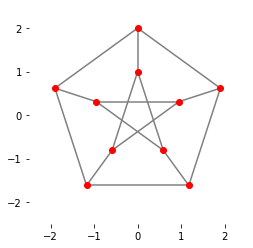

In [6]:
from math import pi, cos, sin
import matplotlib.pyplot as plt

# Five angles π/2 + i * 72°
angles = [i * 2 * pi / 5 + pi / 2 for i in range(5)]

# The five nodes in the inner circle
points = [(cos(t), sin(t)) for t in angles]
# The five nodes in the outer circle
points += [(2 * cos(t), 2 * sin(t)) for t in angles]

# Shortcut for the x-y coordinates of each node
x = [x for x, _ in points]
y = [y for _, y in points]


def plot_edges():
    """Plot the graph without colouring the nodes."""
    plt.axes(frameon=False, aspect=1)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)

    # Build edges between the five nodes in the inner circle
    for i in range(5):
        j, j_ = i, (i + 2) % 5  # % (modulo -> j=4, j_=0)
        plt.plot([x[j], x[j_]], [y[j], y[j_]], color="grey")

    # Build edges between the inner and the outer circle
    for i in range(5):
        plt.plot([x[i], x[i + 5]], [y[i], y[i + 5]], color="grey")

    # Build edges between the five nodes on the outer circle
    for i in range(5):
        j, j_ = 5 + i, 5 + (i + 1) % 5  # % (modulo -> j=9, j_=5)
        plt.plot([x[j], x[j_]], [y[j], y[j_]], color="grey")


plot_edges()

# Colouring nodes
for i, (x_, y_) in enumerate(points):
    plt.plot(x_, y_, "ro")  # 'r' pour red, 'o' pour la forme du point

<div class="alert alert-warning">
<b>Problem #4: (easy)</b><br />
How many colours do you need to colour Petersen's graph? Print the coloured graph.
</div>

<div class="alert alert-danger"><a href="#peterson-more" data-toggle="collapse">**Important note (click to unfold):**</a><br/>
<div id="peterson-more" class="collapse">
The real question to answer is "how many colours do you need?". You may feel the urge to model the problem with a variable representing the number of colours. But take a step back, and think differently: try to solve the problem with 1 colour, then 2 colours and you find no solution. If you try 3 colours you find a solution, so 3 is the answer you want.
</div>
</div>

## The $n$-queen problem

<div class="alert alert-warning">
<b>Problem #5: (intermediate)</b><br />
Solve the 8-queen problem and pretty-print the solution. You may generalise your procedure for $n$ queens.
</div>


<div class="alert alert-danger"><a href="#alldifferent-more" data-toggle="collapse">**Important note (click to unfold):**</a><br/>
<div id="alldifferent-more" class="collapse">
The use of the *alldifferent* constraint is fundamental. You may think it is easier to write all the $\neq$-constraints, but look by yourself:
</div>
</div>

<div class="alert alert-info">
**Let's look further into this!** (out of scope)<br />

The heuristics on the choice of the next variable have a significant impact on the number of backtracks.
</div>

By default, we choose the queens in order:
- `min_domain` chooses the next variable as the one with the smallest domain after propagation;
- `min_min` chooses the next variable as the one with the smallest smallest value in its domain after propagation;
- `queen` is the optimal strategy for the n-queen problem and combines the two previous strategies.

In [ ]:
def queen_strategy(queens):
    if len([q.value() for q in queens if q.value() is None]) == 0:
        return -1
    else:
        min_ = min(
            (len(q.domain()), q.min(), i)
            for i, q in enumerate(queens)
            if q.value() is None
        )
        return min_[2]

In [ ]:
print(n_queens(10, backtrack=True))
print(n_queens(10, strategy="min_domain", backtrack=True))
print(n_queens(10, strategy="min_min", backtrack=True))
print(n_queens(10, strategy=queen_strategy, backtrack=True))

In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 5.6)

interval = range(2, 20)
plt.plot(interval, [(n_queens(i, backtrack=True).backtrack) for i in interval])
plt.plot(
    interval,
    [(n_queens(i, strategy="min_domain", backtrack=True).backtrack) for i in interval],
)
plt.plot(
    interval,
    [
        (n_queens(i, strategy=queen_strategy, backtrack=True).backtrack)
        for i in interval
    ],
    lw=2,
)


plt.axis((interval.start, interval.stop, 0, 70))
plt.legend(["regular", "min_domain", "queen"])

In [ ]:
print(n_queens(1001, strategy="queen", backtrack=True))

### Optimisation

`facile.solve` solves constraint satisfaction problem. You may solve optimisation problems with `facile.minimize`.

<div class="alert alert-success">
**Example :**
Find $x,y \in [0,3]$, constrained by $x \neq y$ and so that $x + y$ is maximum.
</div>

In [ ]:
x, y = [facile.variable(range(5)) for i in range(2)]

facile.constraint(x != y)

# The second parameter represents the expression to minimize.
sol = facile.minimize([x, y], y)
print(sol)

In [ ]:
# You may have access to different parameters in the solution
print(sol.keys())

# The most useful are probably the two following ones
sol.evaluation, sol.solution

<div class="alert alert-warning">
**Problem #6: (intermediate)**<br />
 A Golomb ruler is a set of integers (marks) $a_1 < \cdots a_k$ such that all the differences $a_i - a_j$ (assuming $i > j$) are distinct.  <br />
 Clearly we may assume $a_1 = 0$.  Then $a_k$ is the length of the Golomb ruler. <br />
 For a given number of marks $n$, we want to find the shortest Golomb rulers.
</div>

*Note:* Above $n = 10$ the resolution time may be too long.

<div class="alert alert-danger"><a href="#golomb-more" data-toggle="collapse">**Important note (click to unfold):**</a></div>
<div id="golomb-more" class="collapse">
<div class="alert alert-danger">
Note how you may build a list of expressions $t_i-t_j$ and pass it to *alldifferent*.
</div>

You may also wonder why the correction mentions a domain of variables between 0 and $2^n$.
Consider the assignment `ticks[i] = 2**i` and see how it is a solution to our satisfaction problem. See how you write $2^i - 2^j$ in binary to convince yourself. Then our problem consists of finding the shortest Golomb rule, that is shorter than $2^n$.

Obviously, you are not expected to find this trick by yourself. Initialising the domain to some *reasonably* big range is enough to solve small instances of the problem.

<div class="alert alert-info" style="margin-top: 1em">
**Branch & Bound**: Note how many more backtracks you need to confirm that your better evaluation is the optimal one.
</div>
</div>

<div class="alert alert-warning">
<b>Problem #7: (difficult)</b><br />
You are given an 8 pint bucket of water, and two empty buckets which can contain 5 and 3 pints respectively. You are required to divide the water into two by pouring water between buckets (that is, to end up with 4 pints in the 8 pint bucket, and 4 pints in the 5 pint bucket).<br /><br />

What is the minimum number of transfers of water between buckets?
</div>

<div class="alert alert-danger"><a href="#buckets-more" data-toggle="collapse">**Solution for the modelling part (click to unfold)**:</a></div>
<div id="buckets-more" class="collapse">
<div class="alert alert-danger">
The difficult part here is to get what will be the variables we manipulate. We do not know in advance the number of steps. **The number of steps determines the number of variables, so we cannot make it a variable**: we make it a **constant parameter** that we grow until we find a solution.
</div>


So we have the following table of variables, with the first constraints set:

|       | $s_3$ | $s_5$ | $s_8$ |
|-------|-------|-------|-------|
| $t_1$ | 0     | 0     | 8     |
| $t_2$ | ...   | ...   | ...   |
| $t_3$ | ...   | ...   | ...   |
| ...   | ...   | ...   | ...   |
| ...   | ...   | ...   | ...   |
| $t_n$ | 0     | 4     | 4     |


Then the constraints that we have to program:

- Between two consecutive steps, *exactly two buckets* see their water amount change;
- At each step, the total volume of water is constant;
- Between two consecutive steps, for all pairs of buckets:
    - *either* one of the buckets keeps the same amount of water;
    - *or*, one of the two buckets ends up full;
    - *or*, one of the two buckets ends up empty.
    
<div class="alert alert-danger" style="margin-top: 1em">
**Important note**: Writing *exactly two buckets see their water amount change* is a bit tricky.<br/>
</div> 

You cannot have it with a simple disjunction of constraint (the Python operator `|` which stands for **or**).

You would probably end up saying "the first bucket stays untouched" **or** "the second bucket stays untouched" **or** "the third bucket stays untouched" which does not capture the idea that if one bucket stays untouched, there is a movement of water between the others.

The key here is to use a mechanism called *constraint reification*, that is we (automatically) associate a binary variable to a constraint, taking the value 0 if the constraint is violated in the current assignment and 1 if the constraint is true.

So when we write :
```python
    facile.constraint(sum([e[t][i] != e[t+1][i] for i in something]) == 2)
```

that is, $$\sum \left(e_{t,i} \neq e_{t+1, i} \right) = 2$$
we mean:

- that **exactly** `2` "$\neq$" constraints in the included list are verified,
- **and** that **exactly** `(len(something) - 2)` "$\neq$" constraints in the included list are violated.